# COVID-19 - model regresji 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error
from copy import deepcopy as dc
from sklearn.linear_model import LinearRegression, Ridge
import warnings

In [3]:
warnings.simplefilter('ignore')

### Wczytanie danych przygotowanych

In [4]:
df = pd.read_excel("test.xlsx", index_col = 0)
X = df[57:292]
X.head()


,Suma przebadanych osób,Nowe przebadne osoby,Suma wykonanych testów,Dobowa liczba wykonanych testów,Suma potwierdzonych przypadków,Nowe przypadki,% osób z wynikiem pozytywnym (w ogólnej liczbie testów),% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób),dobowy % osób z wynikiem pozytywnym (w dobowej liczbie testów),dobowy % osób z wynikiem pozytywnym (w dobowej liczbie nowych przebadanych osób),Suma wyników negatywnych i powtórnie pozytywnych,7-dniowa średnia dobowej liczby wykonanych testów,7-dniowa średnia dobowego % wyników pozytywnych (w dobowej liczbie testów),Punkty restrykcji,Dzień pandemii,Nowe zgony,Nowe wyzdrowienia,Suma zgonów,Suma wyzdrowień,Liczba aktywnych przypadków
Data,,,,,,,,,,,,,,,,,,,,
2020-04-28,294589,12802,324527,13783.0,12415,326,0.038256,0.0421435,0.023652,0.0254648,312112,12246.857143,0.029280,1140,57,34.0,189.0,595.0,2655.0,8905.0
2020-04-29,307098,12509,338027,13500.0,12781,366,0.037811,0.0416186,0.027111,0.0292589,325246,12472.571429,0.029414,1140,58,28.0,370.0,623.0,3025.0,8929.0
2020-04-30,322749,15651,354628,16601.0,13105,324,0.036954,0.0406043,0.019517,0.0207016,341523,12775.285714,0.028128,1140,59,20.0,211.0,643.0,3236.0,8998.0
2020-05-01,333362,10613,366013,11385.0,13375,270,0.036542,0.0401215,0.023715,0.0254405,352638,12431.285714,0.028326,1140,60,7.0,255.0,650.0,3491.0,8964.0
2020-05-02,342744,9382,375948,9935.0,13693,318,0.036423,0.0399511,0.032008,0.0338947,362255,12187.857143,0.028873,1140,61,12.0,271.0,662.0,3762.0,8951.0


### Wprowadzenie nowych cech opartych o istniejące

In [5]:
X.loc[:,'Testy_x_Restrykcja'] = (X['Dobowa liczba wykonanych testów']*X['Punkty restrykcji']).pow(1/2)
X.loc[:,'Restrykcja_squared'] = (X['Punkty restrykcji'].pow(2)/10)
X.loc[:,'Restrykcja_x_Aktywne_przypadki'] = (X['Punkty restrykcji']*(X['Liczba aktywnych przypadków']+1)).pow(1/2)
X.loc[:,'Liczba_testów_/_dzień_pandemii'] = X['Dobowa liczba wykonanych testów']/(X['Dzień pandemii']+1)*100
X.loc[:,'Współczynnik pozytywnych testów'] = X['Nowe przypadki']/X['Dobowa liczba wykonanych testów']*1000
X.head()

,Suma przebadanych osób,Nowe przebadne osoby,Suma wykonanych testów,Dobowa liczba wykonanych testów,Suma potwierdzonych przypadków,Nowe przypadki,% osób z wynikiem pozytywnym (w ogólnej liczbie testów),% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób),dobowy % osób z wynikiem pozytywnym (w dobowej liczbie testów),dobowy % osób z wynikiem pozytywnym (w dobowej liczbie nowych przebadanych osób),...,Nowe zgony,Nowe wyzdrowienia,Suma zgonów,Suma wyzdrowień,Liczba aktywnych przypadków,Testy_x_Restrykcja,Restrykcja_squared,Restrykcja_x_Aktywne_przypadki,Liczba_testów_/_dzień_pandemii,Współczynnik pozytywnych testów
Data,,,,,,,,,,,,,,,,,,,,,
2020-04-28,294589,12802,324527,13783.0,12415,326,0.038256,0.0421435,0.023652,0.0254648,...,34.0,189.0,595.0,2655.0,8905.0,3963.914732,129960.0,3186.352146,23763.793103,23.652325
2020-04-29,307098,12509,338027,13500.0,12781,366,0.037811,0.0416186,0.027111,0.0292589,...,28.0,370.0,623.0,3025.0,8929.0,3923.009049,129960.0,3190.642569,22881.355932,27.111111
2020-04-30,322749,15651,354628,16601.0,13105,324,0.036954,0.0406043,0.019517,0.0207016,...,20.0,211.0,643.0,3236.0,8998.0,4350.303438,129960.0,3202.945519,27668.333333,19.516897
2020-05-01,333362,10613,366013,11385.0,13375,270,0.036542,0.0401215,0.023715,0.0254405,...,7.0,255.0,650.0,3491.0,8964.0,3602.624044,129960.0,3196.889113,18663.934426,23.715415
2020-05-02,342744,9382,375948,9935.0,13693,318,0.036423,0.0399511,0.032008,0.0338947,...,12.0,271.0,662.0,3762.0,8951.0,3365.397451,129960.0,3194.570394,16024.193548,32.008052


##### Dodane cechy:
- Pierwiastek z (Liczba dziennych testów * Punkty restrykcji)
- (Punkty restrykcji^2)/10
- Pierwiastek z (Aktywne przypadki * Punkty restrykcji)
- (Liczba testów / numer dnia pandemii)*100
- Liczba nowych przypadków / Dobowa liczba testów

#### Podział danych na zbiory testowe

In [6]:
data_train_1, data_test_1 = train_test_split(X, test_size=0.2, random_state=0)

In [7]:
def RMSE(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

#### Regresja krokowa w przód

1 7-dniowa średnia dobowej liczby wykonanych testów
2 Nowe zgony
3 Restrykcja_squared
4 Nowe przebadne osoby
5 7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)
6 Suma zgonów
7 Suma wyzdrowień
8 Suma potwierdzonych przypadków
9 Liczba aktywnych przypadków
10 % osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)
11 Liczba_testów_/_dzień_pandemii
12 Restrykcja_x_Aktywne_przypadki
13 Dobowa liczba wykonanych testów
14 Dzień pandemii
15 Suma przebadanych osób
16 Testy_x_Restrykcja
17 Punkty restrykcji
18 Suma wyników negatywnych i powtórnie pozytywnych
19 Nowe wyzdrowienia
20 % osób z wynikiem pozytywnym (w ogólnej liczbie testów)
21 Suma wykonanych testów


Text(0, 0.5, 'Błąd')

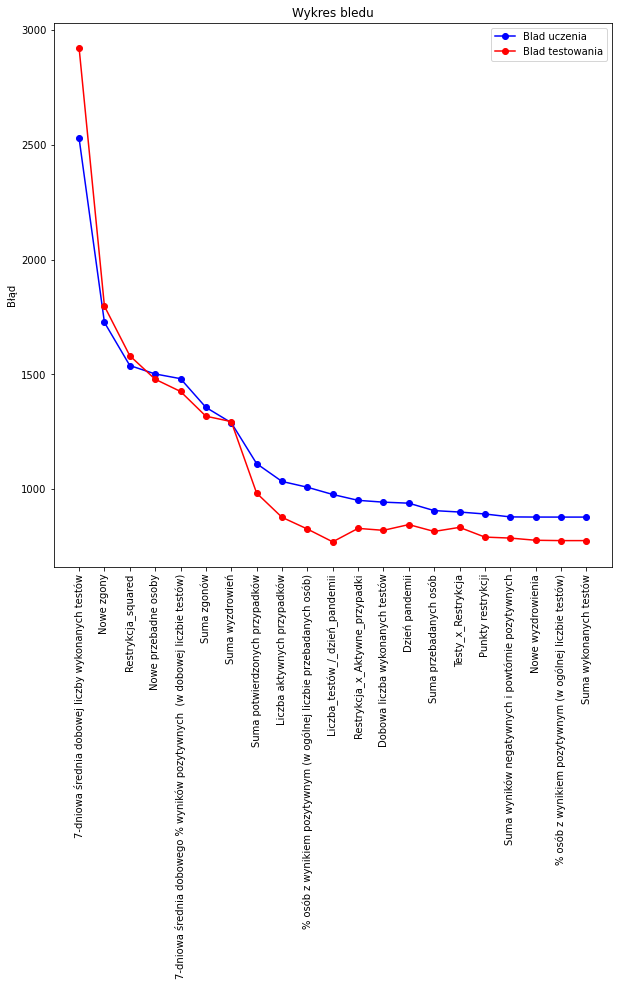

In [8]:
all_features = ['Suma przebadanych osób', 'Nowe przebadne osoby',
       'Suma wykonanych testów', 'Dobowa liczba wykonanych testów',
       'Suma potwierdzonych przypadków',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)',
       'Suma wyników negatywnych i powtórnie pozytywnych',
       '7-dniowa średnia dobowej liczby wykonanych testów',
       '7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
       'Punkty restrykcji', 'Dzień pandemii', 'Nowe zgony',
       'Nowe wyzdrowienia', 'Suma zgonów', 'Suma wyzdrowień',
       'Liczba aktywnych przypadków', 'Testy_x_Restrykcja',
       'Restrykcja_squared', 'Restrykcja_x_Aktywne_przypadki',
       'Liczba_testów_/_dzień_pandemii'
               ]

lr = LinearRegression()
def gready(all_feat, ch_feat):
    rest = dc(all_feat)
    for i in ch_feat:
        rest.remove(i)
    smallest_error = float('inf')
    best_feature = ''
    for i, tmp in enumerate(np.array(rest).reshape(-1, 1)):
        temp_feat = dc(ch_feat)
        temp_feat.append(tmp[0])        
        lr.fit(data_train_1[temp_feat], data_train_1['Nowe przypadki'])
        y_pred_ucz = lr.predict(data_train_1[temp_feat])
        y_pred_test = lr.predict(data_test_1[temp_feat])
        e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
        e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
        current_error = e_ucz_tmp
        if current_error < smallest_error:
            smallest_error = dc(current_error)
            best_feature = dc(tmp)
            e_ucz = dc(e_ucz_tmp)
            e_test = dc(e_test_tmp)
            
    ch_feat.append(best_feature[0])
    return e_ucz, e_test

chosen_features = []
rss_gready = np.zeros((len(all_features),2), dtype=float)
for i in range(len(all_features)):
    rss_gready[i,0], rss_gready[i,1] = gready(all_features, chosen_features)
    print(i+1, chosen_features[-1])
plt.figure(figsize = (10,10))
plt.plot(chosen_features, rss_gready[:,0],'bo-', label="Blad uczenia")
plt.plot(chosen_features, rss_gready[:,1],'ro-', label="Blad testowania")
plt.legend()
plt.title('Wykres bledu')
plt.xticks(rotation='vertical')
plt.ylabel('Błąd') 

#### Regresja krokowa w tył

1 Suma wyników negatywnych i powtórnie pozytywnych
2 % osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)
3 Nowe wyzdrowienia
4 Nowe przebadne osoby
5 % osób z wynikiem pozytywnym (w ogólnej liczbie testów)
6 7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)
7 Restrykcja_squared
8 Punkty restrykcji
9 Suma wykonanych testów
10 Testy_x_Restrykcja
11 Suma wyzdrowień
12 Restrykcja_x_Aktywne_przypadki
13 Suma przebadanych osób
14 Liczba_testów_/_dzień_pandemii
15 Dzień pandemii
16 Dobowa liczba wykonanych testów
17 Liczba aktywnych przypadków
18 Suma potwierdzonych przypadków
19 Suma zgonów
20 Nowe zgony


Text(0, 0.5, 'Błąd')

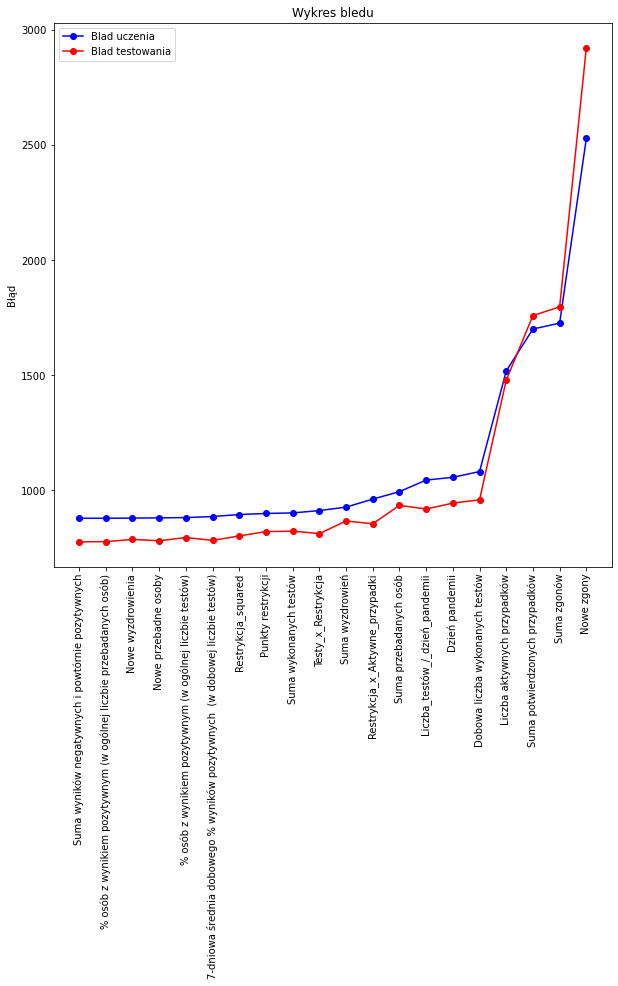

In [9]:
all_features = ['Suma przebadanych osób', 'Nowe przebadne osoby',
       'Suma wykonanych testów', 'Dobowa liczba wykonanych testów',
       'Suma potwierdzonych przypadków',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)',
       'Suma wyników negatywnych i powtórnie pozytywnych',
       '7-dniowa średnia dobowej liczby wykonanych testów',
       '7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
       'Punkty restrykcji', 'Dzień pandemii', 'Nowe zgony',
       'Nowe wyzdrowienia', 'Suma zgonów', 'Suma wyzdrowień',
       'Liczba aktywnych przypadków', 'Testy_x_Restrykcja',
       'Restrykcja_squared', 'Restrykcja_x_Aktywne_przypadki',
       'Liczba_testów_/_dzień_pandemii'
               ]
data_train_1, data_test_1 = train_test_split(X, test_size=0.2, random_state=0)

lr = LinearRegression()
def gready_back(all_feat, ch_feat):
    smallest_error = float('inf')
    worst_feature = ''
    for i, tmp in enumerate(np.array(all_feat).reshape(-1, 1)):
        copy_feat = dc(all_feat)
        copy_feat.remove(tmp)   
        lr.fit(data_train_1[copy_feat], data_train_1['Nowe przypadki'])
        y_pred_ucz = lr.predict(data_train_1[copy_feat])
        y_pred_test = lr.predict(data_test_1[copy_feat])
        e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
        e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
        current_error = e_ucz_tmp
        if current_error < smallest_error:
            smallest_error = dc(current_error)
            worst_feature = dc(tmp)
            e_ucz = dc(e_ucz_tmp)
            e_test = dc(e_test_tmp)
            
    all_feat.remove(worst_feature[0])
    ch_feat.append(worst_feature[0])
    return e_ucz, e_test

chosen_features = []
rss_gready = np.zeros((len(all_features)-1,2), dtype=float)
for i in range(len(all_features)-1):
    rss_gready[i,0], rss_gready[i,1] = gready_back(all_features, chosen_features)
    print(i+1, chosen_features[-1])

plt.figure(figsize = (10,10))    
plt.plot(chosen_features, rss_gready[:,0],'bo-', label="Blad uczenia")
plt.plot(chosen_features, rss_gready[:,1],'ro-', label="Blad testowania")
plt.legend()
plt.title('Wykres bledu')
plt.xticks(rotation='vertical')
plt.ylabel('Błąd')

#### Metoda Lasso dla znormalizowanych cech dla różnych współczynników lambda



Alpha = 0
Blad uczenia: 968.03
Blad testowania: 855.14
[('% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)', 92610.48469491948), ('7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)', 25471.14583201649), ('Nowe zgony', 12.177620234835098), ('Testy_x_Restrykcja', 1.3694418154598307)]


Alpha = 1e-05
Blad uczenia: 968.03
Blad testowania: 855.13
[('% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)', 92592.24181078763), ('7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)', 25470.149986330565), ('Nowe zgony', 12.177565752035223), ('Testy_x_Restrykcja', 1.3693949844339657)]


Alpha = 0.005
Blad uczenia: 965.77
Blad testowania: 851.24
[('% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)', 82629.95677410107), ('7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)', 25040.640422035758), ('Nowe zgony', 12.149529711346156), ('Testy_x_Restrykcja', 1.3515720788750505)]


A

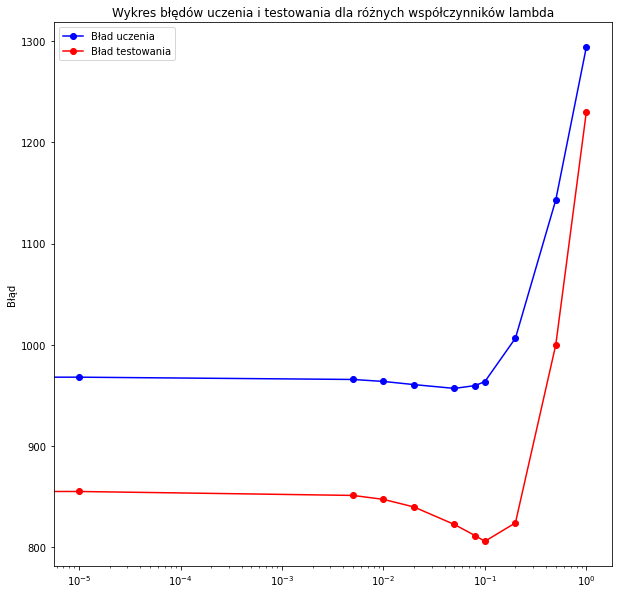

In [10]:
all_features = ['Suma przebadanych osób', 'Nowe przebadne osoby',
       'Suma wykonanych testów', 'Dobowa liczba wykonanych testów',
       'Suma potwierdzonych przypadków',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
       '% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)',
       'Suma wyników negatywnych i powtórnie pozytywnych',
       '7-dniowa średnia dobowej liczby wykonanych testów',
       '7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
       'Punkty restrykcji', 'Dzień pandemii', 'Nowe zgony',
       'Nowe wyzdrowienia', 'Suma zgonów', 'Suma wyzdrowień',
       'Liczba aktywnych przypadków', 'Testy_x_Restrykcja',
       'Restrykcja_squared', 'Restrykcja_x_Aktywne_przypadki',
       'Liczba_testów_/_dzień_pandemii'
               ]
data_train_1, data_test_1 = train_test_split(X, test_size=0.2, random_state=0)
err = np.zeros((11,2), dtype=float)
j = 0
for i in [0, 0.00001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 1]:
    print('\n')
    print('Alpha = ' + str(i))
    model_lasso_1 = linear_model.Lasso(alpha=i, normalize=True, max_iter=10000)
    model_lasso_1.fit(data_train_1[all_features], data_train_1['Nowe przypadki'])
    y_pred_ucz_1 = model_lasso_1.predict(data_train_1[all_features])
    y_pred_test_1 = model_lasso_1.predict(data_test_1[all_features])
    e_ucz_1 = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz_1)
    e_test_1 = RMSE(data_test_1['Nowe przypadki'], y_pred_test_1)
    print("Blad uczenia: {:.2f}".format(e_ucz_1))
    print("Blad testowania: {:.2f}".format(e_test_1))
    wyniki = list(zip(list(all_features),model_lasso_1.coef_))
    err[j,0] = e_ucz_1
    err[j,1] = e_test_1
    for e in wyniki:
        for e in wyniki:
            if(e[1] < float(1)):
                wyniki.remove(e)
    print(wyniki)
    j+=1
    
plt.figure(figsize = (10,10))
plt.semilogx([0, 0.00001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 1], err[:,0],'bo-', label="Bład uczenia")
plt.semilogx([0, 0.00001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 1], err[:,1],'ro-', label="Bład testowania")
plt.title('Wykres błędów uczenia i testowania dla różnych współczynników lambda')
plt.legend()
plt.ylabel('Błąd')
plt.show()

#### Regularyzacja dla metody grzbierowej dla 5 cech z najmniejszymi błędami uzyskanymi w metodzie Lasso

In [11]:
chosen_features = ['% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
                   '% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)', 
                   '7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
                   'Nowe zgony', 
                   'Testy_x_Restrykcja']
data_train_1, data_test_1 = train_test_split(X, test_size=0.2, random_state=0)

def PolyCoef(x, coeffs):
    y = 0
    for i in range(len(coeffs)):
        y += coeffs[i]*x**i
    return y
lamb = np.insert(np.column_stack(0.00001*(2**(i)) for i in range(12)), 0, 0)
param_grid = dict(alpha=lamb)
cv=10
grid = GridSearchCV(Ridge(),param_grid, cv=cv)
grid.fit(data_train_1[chosen_features], data_train_1['Nowe przypadki'])
print("Najlepszy parametr z GridSearchCV: ", grid.best_params_)

Najlepszy parametr z GridSearchCV:  {'alpha': 0.01024}


#### Porównanie modeli liniowych dla:
- Wszystkich cech
- Cech wybranych w oparciu o metodę krokową w przód
- Cech wybranych w oparciu o metodę krokową w tył
- Cech wybranych za pomocą metody Lasso

In [13]:
lr = LinearRegression()

features_1 = ['Suma przebadanych osób', 'Nowe przebadne osoby',
'Suma wykonanych testów', 'Dobowa liczba wykonanych testów',
'Suma potwierdzonych przypadków',
'% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
'% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)',
'Suma wyników negatywnych i powtórnie pozytywnych',
'7-dniowa średnia dobowej liczby wykonanych testów',
'7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
'Punkty restrykcji', 'Dzień pandemii', 'Nowe zgony',
'Nowe wyzdrowienia', 'Suma zgonów', 'Suma wyzdrowień',
'Liczba aktywnych przypadków', 'Testy_x_Restrykcja',
'Restrykcja_squared', 'Restrykcja_x_Aktywne_przypadki',
'Liczba_testów_/_dzień_pandemii'
               ]

features_2 = ['7-dniowa średnia dobowej liczby wykonanych testów'
,'Nowe zgony'
,'Restrykcja_squared'
,'Nowe przebadne osoby'
,'7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)'
,'Suma zgonów'
,'Suma wyzdrowień'
,'Suma potwierdzonych przypadków'
,'Liczba aktywnych przypadków'
,'% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)'
,'Liczba_testów_/_dzień_pandemii']

features_3 = ['Dobowa liczba wykonanych testów',
'Liczba aktywnych przypadków'
,'Suma potwierdzonych przypadków'
,'Suma zgonów'
,'Nowe zgony']

features_4 = ['% osób z wynikiem pozytywnym (w ogólnej liczbie testów)',
'% osób z wynikiem pozytywnym (w ogólnej liczbie przebadanych osób)', 
'7-dniowa średnia dobowego % wyników pozytywnych  (w dobowej liczbie testów)',
'Nowe zgony', 
'Testy_x_Restrykcja']


data_train_1, data_test_1 = train_test_split(X, test_size=0.2, random_state=0)


print('Błędy regresji liniowej dla wszystkich cech')
lr.fit(data_train_1[features_1], data_train_1['Nowe przypadki'])
y_pred_ucz = lr.predict(data_train_1[features_1])
y_pred_test = lr.predict(data_test_1[features_1])
e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
print("Błąd uczenia: {:.2f}".format(e_ucz_tmp))
print("Błąd testowania: {:.2f}".format(e_test_tmp))

print('\n')
print('Błędy regresji liniowej dla cech wybranych z metody krokowej w przód')
lr.fit(data_train_1[features_2], data_train_1['Nowe przypadki'])
y_pred_ucz = lr.predict(data_train_1[features_2])
y_pred_test = lr.predict(data_test_1[features_2])
e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
print("Błąd uczenia: {:.2f}".format(e_ucz_tmp))
print("Błąd testowania: {:.2f}".format(e_test_tmp))

print('\n')
print('Błędy regresji liniowej dla cech wybranych z metody krokowej w tył')
lr.fit(data_train_1[features_3], data_train_1['Nowe przypadki'])
y_pred_ucz = lr.predict(data_train_1[features_3])
y_pred_test = lr.predict(data_test_1[features_3])
e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
print("Błąd uczenia: {:.2f}".format(e_ucz_tmp))
print("Błąd testowania: {:.2f}".format(e_test_tmp))

print('\n')
print('Błędy regresji liniowej dla cech wybranych z metody Lasso')
lr.fit(data_train_1[features_4], data_train_1['Nowe przypadki'])
y_pred_ucz = lr.predict(data_train_1[features_4])
y_pred_test = lr.predict(data_test_1[features_4])
e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
print("Błąd uczenia: {:.2f}".format(e_ucz_tmp))
print("Błąd testowania: {:.2f}".format(e_test_tmp))

print('\n')
print('Błędy regresji liniowej dla cech wybranych z metody Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji')
ridge = Ridge(alpha=0.01024, max_iter=10000)
ridge.fit(data_train_1[features_4], data_train_1['Nowe przypadki'])
y_pred_ucz = ridge.predict(data_train_1[features_4])
y_pred_test = ridge.predict(data_test_1[features_4])
e_ucz_tmp = RMSE(data_train_1['Nowe przypadki'], y_pred_ucz)
e_test_tmp = RMSE(data_test_1['Nowe przypadki'], y_pred_test)
print("Błąd uczenia: {:.2f}".format(e_ucz_tmp))
print("Błąd testowania: {:.2f}".format(e_test_tmp))


Błędy regresji liniowej dla wszystkich cech
Błąd uczenia: 878.66
Błąd testowania: 776.16


Błędy regresji liniowej dla cech wybranych z metody krokowej w przód
Błąd uczenia: 977.22
Błąd testowania: 770.79


Błędy regresji liniowej dla cech wybranych z metody krokowej w tył
Błąd uczenia: 1514.03
Błąd testowania: 1522.31


Błędy regresji liniowej dla cech wybranych z metody Lasso
Błąd uczenia: 1762.59
Błąd testowania: 1725.40


Błędy regresji liniowej dla cech wybranych z metody Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji
Błącz uczenia: 1800.13
Błącz testowania: 1725.16
